<a href="https://colab.research.google.com/github/Saurav-Raghaw/DataScience/blob/main/LinearRegression_mpg_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Description
* **Context**




The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository.

* **Content**



"The data concerns city-cycle fuel consumption in miles per gallon, 
to be predicted in terms of 3 multivalued discrete and 5 continuous 
attributes." (Quinlan, 1993)

Number of Instances: 398

Number of Attributes: 9 including the class attribute

* **Attribute Information:**

mpg: continuous

cylinders: multi-valued discrete

displacement: continuous

horsepower: continuous

weight: continuous

acceleration: continuous

model year: multi-valued discrete

origin: multi-valued discrete

car name: string (unique for each instance)

Missing Attribute Values: horsepower has 6 missing values.


* **Acknowledgements**

Dataset: UCI Machine Learning Repository

Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg

* **Inspiration**

I have used this dataset for practicing my exploratory analysis skills.

#Importing the Liabraries.

In [636]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

#Loading and Reviewing the data.

In [637]:
df = pd.read_csv("auto-mpg.csv")  
df.shape #rows and columns

(398, 9)

In [638]:
df.head() #Top 5 rows

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#Getting Introduced with our Dataset.

In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [640]:
df.dtypes #datatype of each features.

#Object type in pandas is similar to strings.

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [641]:
#A quick summary of the data columns
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000



* For numeric data, the result's index will include ``count``, ``mean``, ``std``, ``min``, ``max`` as well as lower, ``50`` and
upper percentiles. By default the lower percentile is ``25`` and the upper percentile is ``75``. The ``50`` percentile is the
same as the median.


* For mixed data types provided via a ``DataFrame``, the default is to
return only an analysis of numeric columns. If the dataframe consists
only of object and categorical data without any numeric columns, the
default is to return an analysis of both the object and categorical
columns. If ``include='all'`` is provided as an option, the result
will include a union of attributes of each type.



In [642]:
df.describe(include='all') #All columns of the input will be included in the output.

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


#Cleaning the Data

1. Checking our missing values are made of up, which type of dataype and then replacing the missing values with NaN values.

* str.isdigit()

Check whether all characters in each string are digits.

This is equivalent to running the Python string method
:meth:`str.isdigit` for each element of the Series/Index. If a string
has zero characters, ``False`` is returned for that check.

* Returns

-------
    Series or Index of boolean values with the same length as the original
    Series/Index.
--------

Series.str.isalpha : Check whether all characters are alphabetic.

Series.str.isnumeric : Check whether all characters are numeric.

Series.str.isalnum : Check whether all characters are alphanumeric.

Series.str.isdigit : Check whether all characters are digits.

Series.str.isdecimal : Check whether all characters are decimal.

Series.str.isspace : Check whether all characters are whitespace.

Series.str.islower : Check whether all characters are lowercase.

Series.str.isupper : Check whether all characters are uppercase.

Series.str.istitle : Check whether all characters are titlecase.

In [643]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(df.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
df[hpIsDigit['hp'] == False]  # from Series take only those rows where hp has false.

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [644]:
# Missing values have a'?''
# Replace missing values with NaN
df = df.replace('?', np.nan)

df[hpIsDigit['hp'] == False] 

#or
##bool_series = pd.isnull(df["hp"]) 
    
# filtering data 
# displayind data only with hp = NaN 
##df[bool_series] 

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [645]:
# Counting total NaN at each column in a DataFrame.
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

In [646]:
#Counting total NaN in a DataFrame.
df.isnull().sum().sum()

6

In [647]:
#isnull(): In order to check null values in Pandas DataFrame, we use isnull() function this function 
#return dataframe of Boolean values which are True for NaN values.

df[329:378].isnull()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
329,False,False,False,False,False,False,False,False,False
330,False,False,False,True,False,False,False,False,False
331,False,False,False,False,False,False,False,False,False
332,False,False,False,False,False,False,False,False,False
333,False,False,False,False,False,False,False,False,False
334,False,False,False,False,False,False,False,False,False
335,False,False,False,False,False,False,False,False,False
336,False,False,False,True,False,False,False,False,False
337,False,False,False,False,False,False,False,False,False
338,False,False,False,False,False,False,False,False,False


In [648]:
#notnull(): In order to check null values in Pandas Dataframe, we use notnull() function this function return 
#dataframe of Boolean values which are False for NaN values.

df.notnull()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
393,True,True,True,True,True,True,True,True,True
394,True,True,True,True,True,True,True,True,True
395,True,True,True,True,True,True,True,True,True
396,True,True,True,True,True,True,True,True,True


There are various ways to handle missing values. 
* Filling missing values using fillna(), replace() and interpolate().


> Filling null values with a single value. 

```
df.fillna(0)
```


> Filling null values with the previous ones.


```
df.fillna(method ='pad')
```
> Filling null value with the next ones.


```
df.fillna(method ='bfill')
```
> Filling a null values using specific name using fillna().


```
df_new = df["hp"].fillna("Missing valuse")
```

> Using interpolate() function to fill the missing values using linear method.



```
df.interpolate(method ='linear', limit_direction ='forward')

```

> Dropping missing values using dropna().

```
df.dropna()
```

> Dropping rows if all values in that row are missing.

```
df.dropna(how = 'all')
```
> Dropping Rows with at least 1 null value.

```
new_df = df.dropna(axis = 0, how ='any') 
```










* Drop the rows. 
* Replace missing values with median or mean or mode values using replace() etc. 



In [649]:
#Getting the statistical values corresponding to each features.
print(df.median()) 
print("\n")
print(df.mean())
print("\n")

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64


mpg         23.514573
cyl          5.454774
disp       193.425879
wt        2970.424623
acc         15.568090
yr          76.010050
origin       1.572864
dtype: float64




In [650]:
#Filling a null values using replace() method.
df.replace(to_replace = np.nan, value = df['hp'].median(), inplace=True) 

In [651]:
# converting the hp column from object / string type to float
df['hp'] = df['hp'].astype('float64')

df.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

2. Dropping/Ignoring the unnecessary features.


In [652]:
df = df.drop('car name', axis=1) #axis =1  or axis='columns' and axis=0 or axis ='rows'.

In [653]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [654]:
#Another method.

# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means rowwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
df = df.apply(medianFiller,axis=0)

In [655]:
#Checking wethere it is replaced or not.
df[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,93.5,2046,19.0,71,1
126,21.0,6,200.0,93.5,2875,17.0,74,1
330,40.9,4,85.0,93.5,1835,17.3,80,2
336,23.6,4,140.0,93.5,2905,14.3,80,1
354,34.5,4,100.0,93.5,2320,15.8,81,2
374,23.0,4,151.0,93.5,3035,20.5,82,1


3. Replacing the categorical variable with actual values.





In [656]:
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


4. Replacing categorial features with numerical values.

The Categorical Features are those features in which datatype is an Object type.
* There are many techniques for handling the categorical variables, some are :



```
1. Label Encoding or Ordinal Encoding
2. One hot Encoding
3. Dummy Encoding
4. Effect Encoding
5. Binary Encoding
6. Basel Encoding
7. Hash Encoding
8. Target Encoding

```
* One-Hot Encoding For Multi Categorical Variables.

Note: If we use one-hot encoding then encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results.





In [657]:
#pandas select_dtypes function is used for selecting the data types of variable.
# checking features
cat = df.select_dtypes(include='O').keys()
# display variabels
cat

Index(['origin'], dtype='object')

In [658]:
#We can convert the values in the 'origin' column into one-hot encoded vectors using the get_dummies() function.
y = pd.get_dummies(df.origin, prefix='origin')

In [659]:
#Droping origin.
df.drop('origin', axis=1, inplace=True)

In [660]:
#Adding y to df.

df = pd.concat([df,y], axis=1)
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


#Feature Selection.(EDA) /Visualization.

* Visualization for numerical variables will be a bit different from the ordinal and categorical variables. We may create bar plots by first creating bins, but a better plot will be a distribution, dotted line or box plot, as it will help us in identifying outliers.




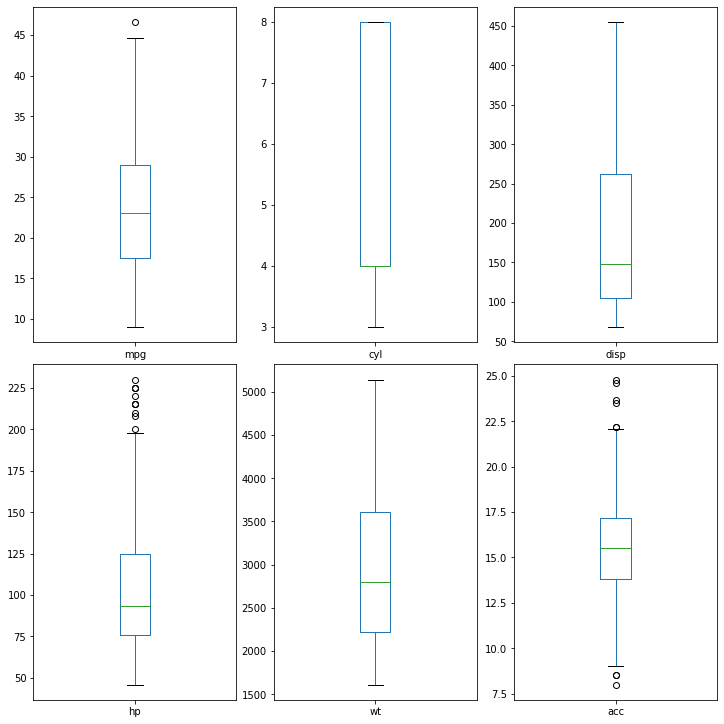

In [661]:
#Univariate Analysis.
plt.subplot(231)
df['mpg'].plot.box(figsize=(10,10))
plt.tight_layout(pad=0.5)

plt.subplot(232)
df['cyl'].plot.box(figsize=(10,10))
plt.tight_layout(pad=0.5)

plt.subplot(233)
df['disp'].plot.box(figsize=(10,10))
plt.tight_layout(pad=0.5)

plt.subplot(234)
df['hp'].plot.box(figsize=(10,10))
plt.tight_layout(pad=0.5)

plt.subplot(235)
df['wt'].plot.box(figsize=(10,10))
plt.tight_layout(pad=0.5)

plt.subplot(236)
df['acc'].plot.box(figsize=(10,10))
plt.tight_layout(pad=0.5)

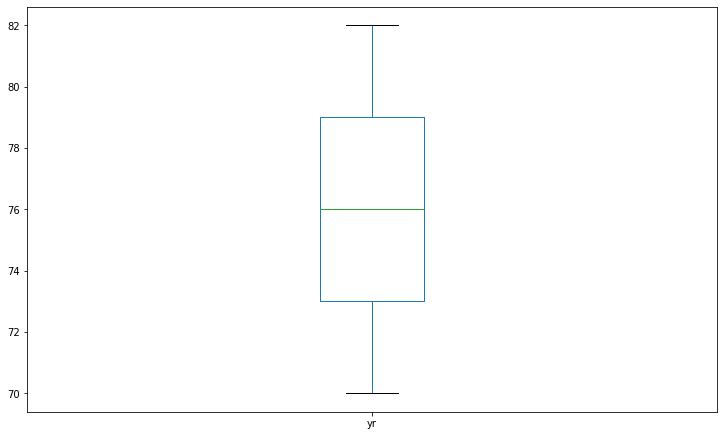

In [662]:
plt.subplot(111)
df['yr'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)

In [663]:
#Removing Outliers from hp and acc.
#df = df[df['hp']<=220]
#df = df[df['acc']<=22.5]

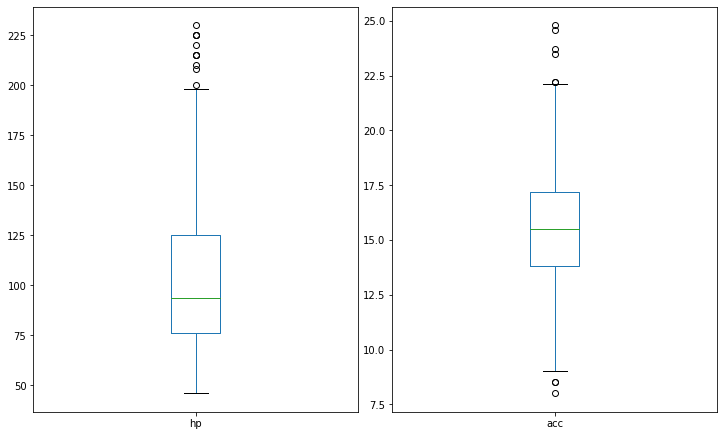

In [664]:
plt.subplot(121)
df['hp'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)

plt.subplot(122)
df['acc'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)

In [665]:
df.shape

(398, 10)

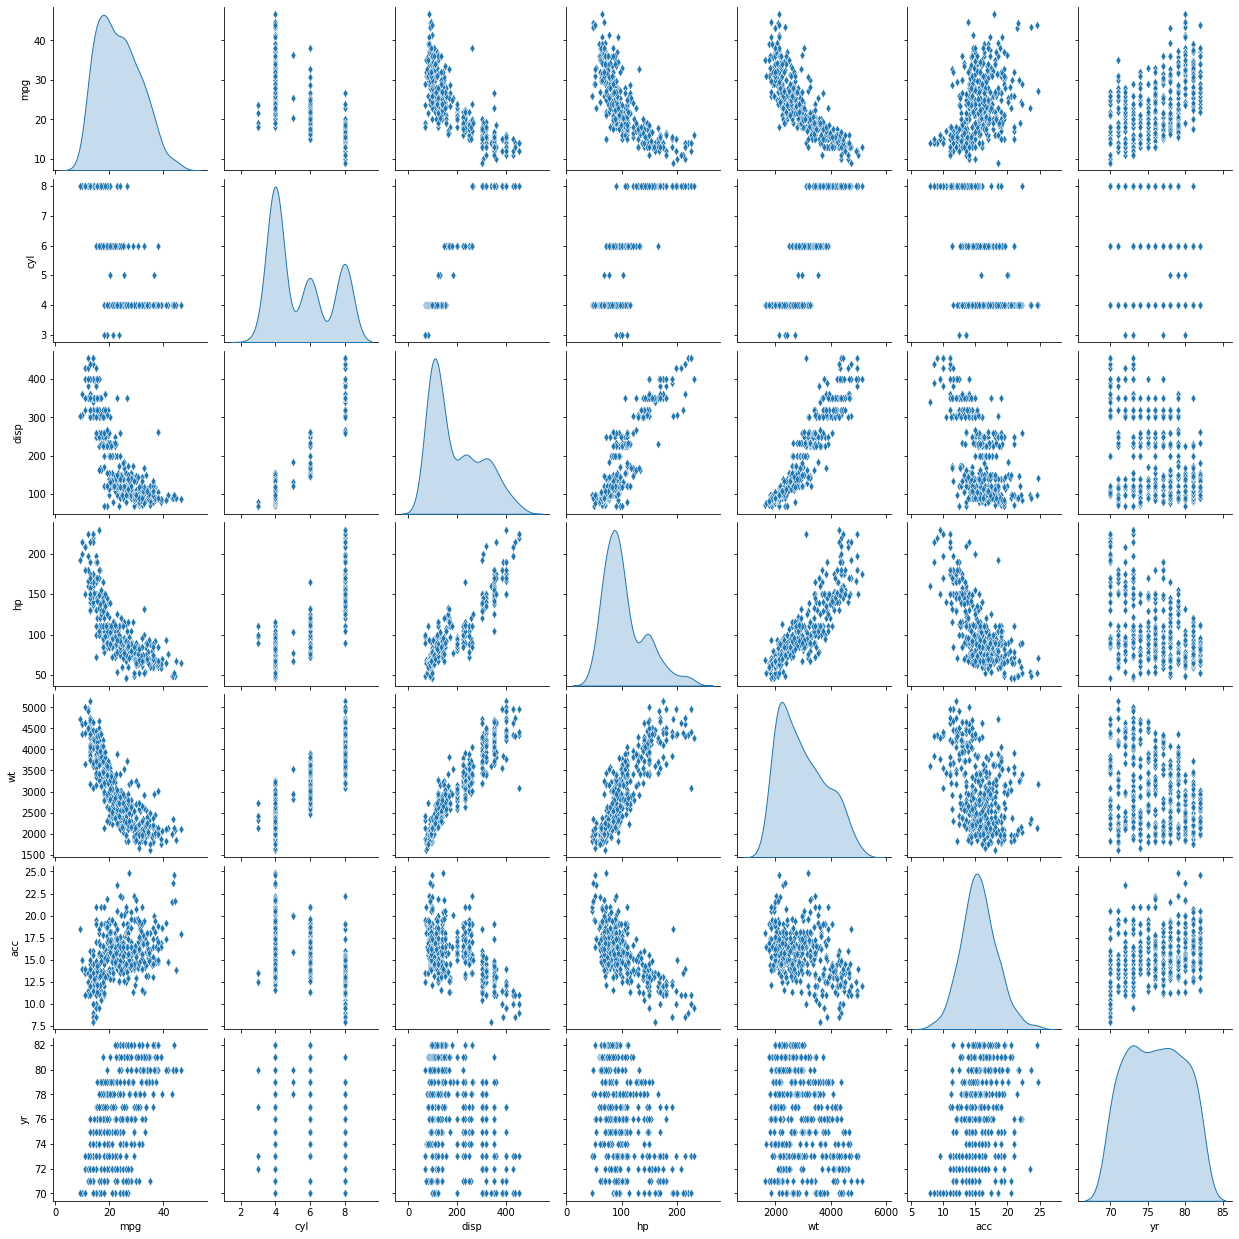

In [666]:
#Bivariate Analysis.
#A bivariate analysis among the different variables can be done using scatter matrix plot. 
#Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

df_attr = df.iloc[:, 0:7]
sns.pairplot(df_attr, diag_kind='kde', markers='d')   # to plot density curve instead of histogram on the diag

#diag_kind : {'auto', 'hist', 'kde', None}
#Kind of plot for the diagonal subplots. If 'auto', choose based on
#whether or not ``hue`` is used.

* Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern.

* from the pairplot: wt and disp has some kind of Linear relationship and also wt and hp also wt and cyl.

* Finding a correlation between numerical variables in the dataset.

In [667]:
correlation_mat = df.corr()
correlation_mat

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,-0.568192,0.442174,0.259022
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,0.604351,-0.396479,-0.352861
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,0.651407,-0.433505,-0.373886
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,0.485418,-0.318972,-0.282877
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,0.598398,-0.440817,-0.298843
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,-0.250806,0.109144,0.204473
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.139883,0.193101,-0.024489
origin_america,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,1.000000,-0.643317,-0.597198
origin_asia,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,-0.643317,1.000000,-0.229895
origin_europe,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,-0.597198,-0.229895,1.000000


* visualize the data in this correlation matrix using a heat map.

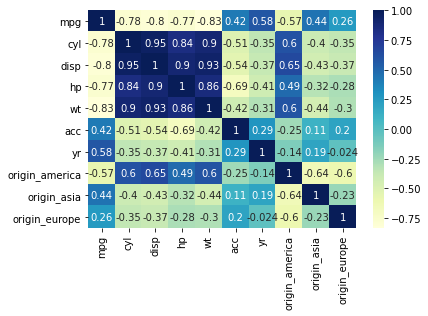

In [668]:
sns.heatmap(correlation_mat,annot=True, cmap="YlGnBu")
plt.show()

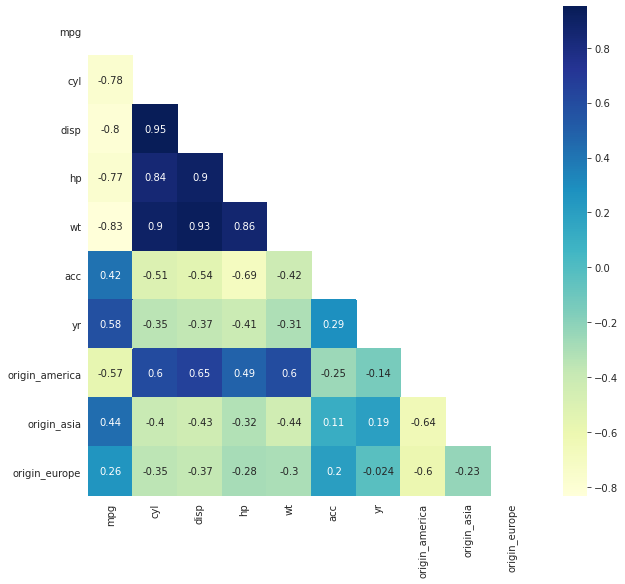

In [669]:
#Deleting the upper half of heat map, since its repetitive.
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,9))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

* wt is highly coorelated with cyl, disp and hp. Should we drop it? I think not a good idea because again wt and acc, yr is loosly coorelated.

In [670]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [671]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


#Building the Simple Linear Model.




In [672]:
# lets build our linear model
# independant variables
X = df.drop(['mpg'], axis=1)
# the dependent variable
y = df[['mpg']]

In [673]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#random state: Controls the shuffling applied to the data before applying the split.
#Pass an int for reproducible output across multiple function calls.

#Fit Linear Model

In [674]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [675]:
#Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for cyl is -0.39480796616483205
The coefficient for disp is 0.028945510765487483
The coefficient for hp is -0.02175220772354737
The coefficient for wt is -0.007352032065147358
The coefficient for acc is 0.06191936600761753
The coefficient for yr is 0.8369338917645016
The coefficient for origin_america is -1.798849345837429
The coefficient for origin_asia is 0.5964156907563457
The coefficient for origin_europe is 1.2024336550810832


In [676]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -19.48588477145324


In [677]:
#The score (R^2) for in-sample and out of sample.
reg_model.score(X_train, y_train)

0.8141025501610559

In [678]:
#out of sample score (R^2)
reg_model.score(X_test, y_test)

0.8433135132808827

In [695]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.8995492104963149


In [696]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8613490752804132


* Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly. 


In [697]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 9)
(278, 46)
